# Problem Statement

### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

- Model -- model of the car
- Price  -- Offer Price in EUROs	
- Age_08_04 -- Age in months as in August 2004	
- Mfg_Month -- Manufacturing month (1-12)	
- Mfg_Year	-- Manufacturing Year
- KM -- Accumulated Kilometers on odometer
- Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
- HP -- Horse Power
- Met_Color	 -- Metallic Color?  (Yes=1, No=0)
- Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic	-- Automatic ( (Yes=1, No=0)
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Cylinders	-- Number of cylinders
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms
- Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
- BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
- Guarantee_Period -- 	Guarantee period in months
- ABS -- Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
- Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
- Airco -- Airconditioning  (Yes=1, No=0)
- Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
- Boardcomputer -- Boardcomputer  (Yes=1, No=0)
- CD_Player -- CD Player  (Yes=1, No=0)
- Central_Lock -- Central Lock  (Yes=1, No=0)
- Powered_Windows -- Powered Windows  (Yes=1, No=0)
- Power_Steering -- Power Steering  (Yes=1, No=0)
- Radio -- Radio  (Yes=1, No=0)
- Mistlamps	-- Mistlamps  (Yes=1, No=0)
- Sport_Model -- Sport Model  (Yes=1, No=0)
- Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
- Metallic_Rim --Metallic Rim  (Yes=1, No=0)
- Radio_cassette -- Radio Cassette  (Yes=1, No=0)
- Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
toyota = pd.read_csv('ToyotaCorolla.csv', encoding= 'unicode_escape')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
toyota.shape

(1436, 38)

In [4]:
# data.filter command works same as WHERE clause in SQL

toyota_df = toyota.filter(["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"], axis=1)
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
toyota_df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# Correlation Matrix

In [6]:
toyota_df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histograms

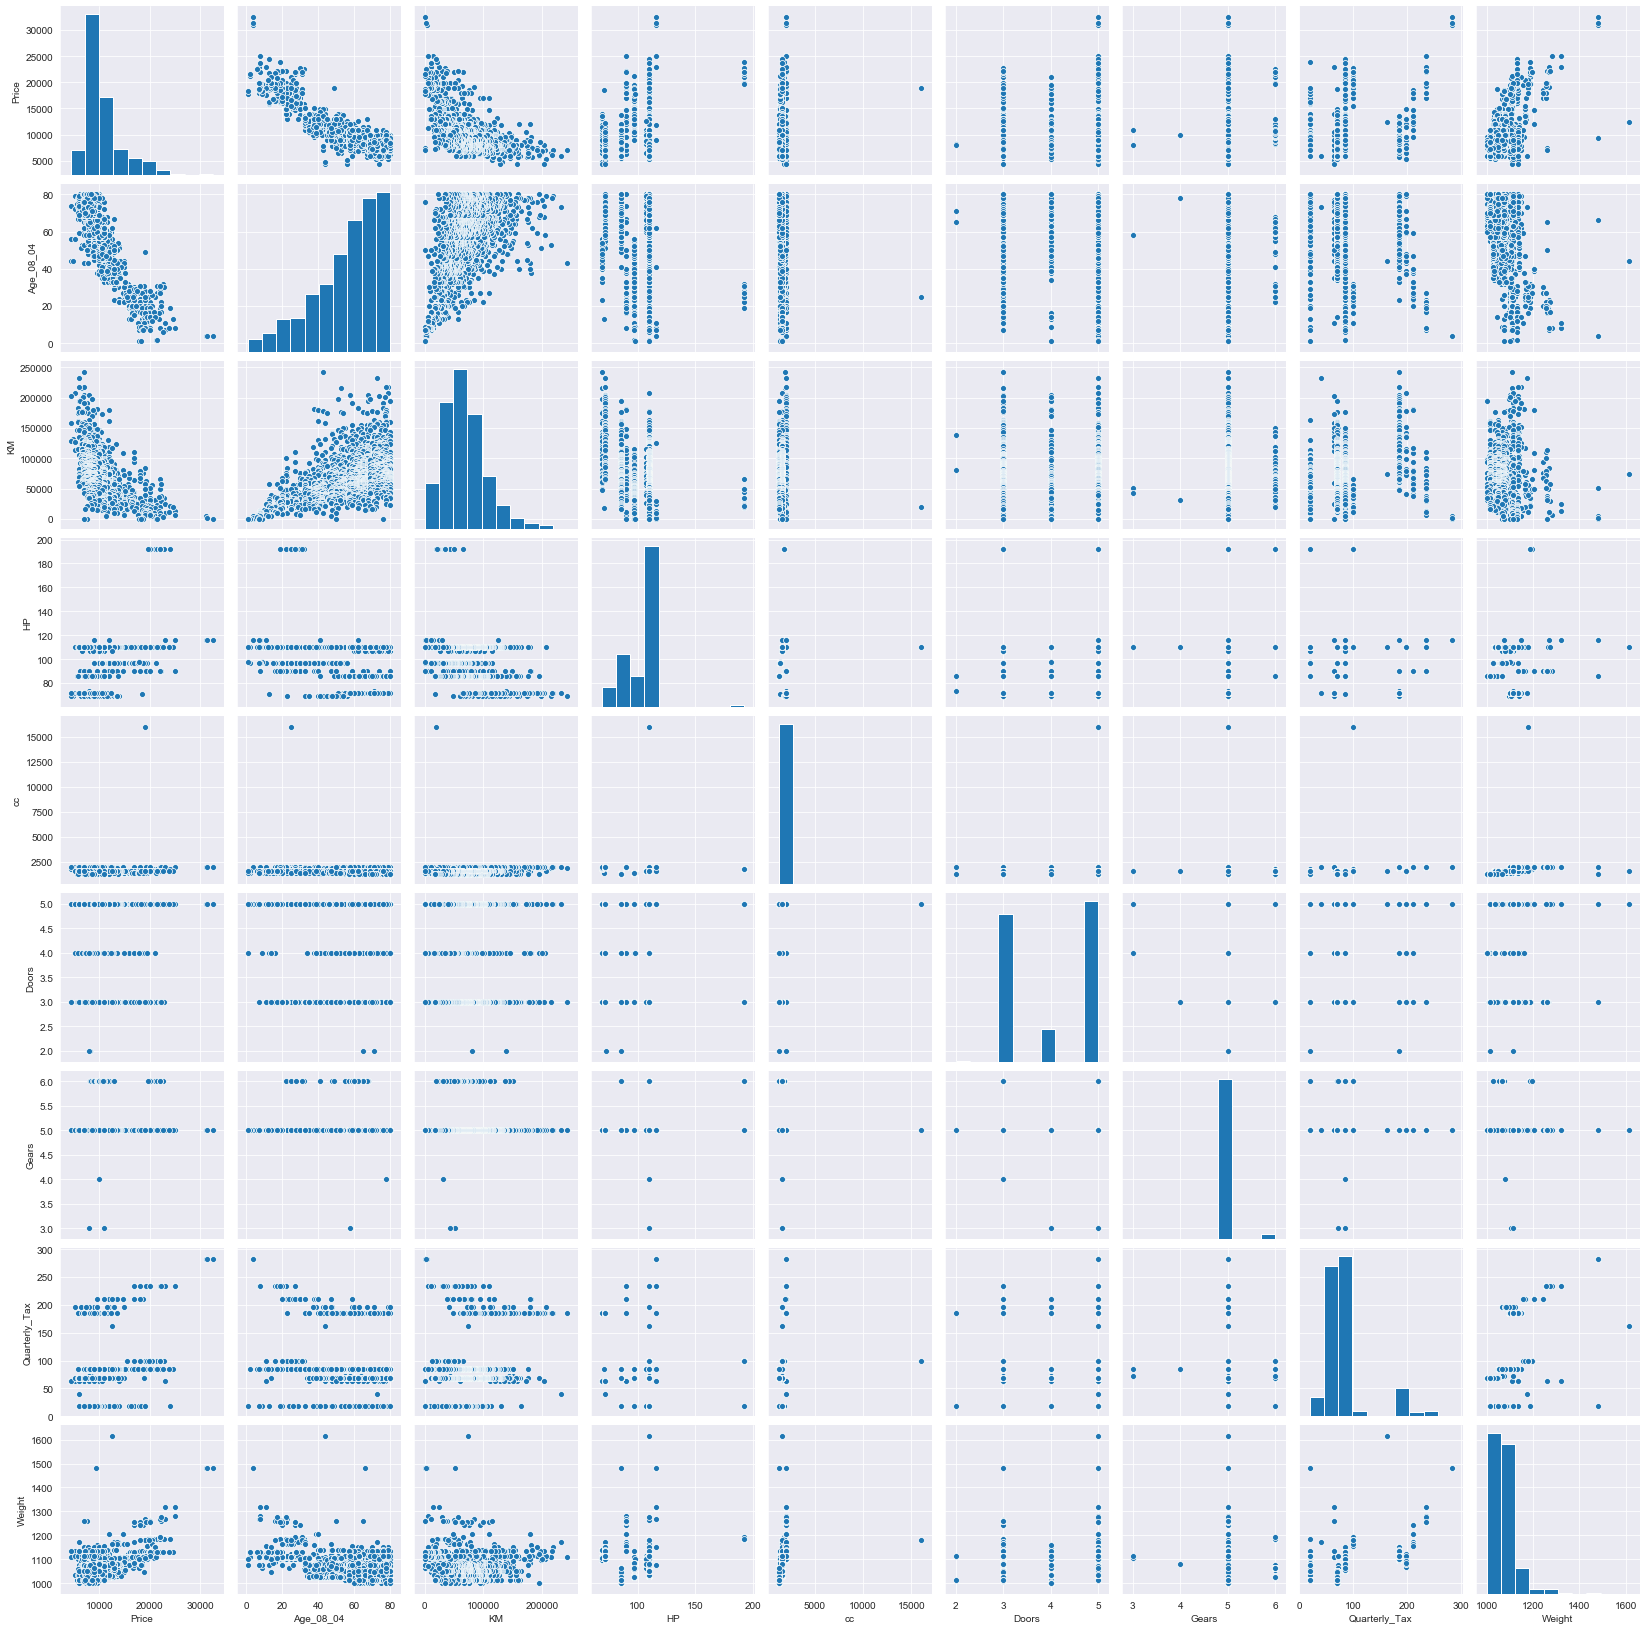

In [7]:
sns.set_style(style = 'darkgrid')
sns.pairplot(toyota_df)

# Preparing a model

In [8]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota_df).fit()

In [9]:
#Coefficients
model1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:15:35   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Multicollinearity exist between cc and Doors
- Here, cc and Doors have pvalue > 0.05 so they are insignificant for our model1 

In [11]:
#t and p-Values
print('t-values\n', model1.tvalues, '\n\n', 'p-values\n' ,model1.pvalues)

t-values
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 

 p-values
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [12]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Simple Linear Regression Models for insignificant variables 
### ( cc and Doors)

In [13]:
ml_cc = smf.ols('Price ~ cc',data = toyota_df).fit()  

#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [14]:
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.55e-06
Time:                        20:15:35   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- cc is significant when used independently to predict Price

In [15]:
ml_door = smf.ols('Price ~ Doors',data = toyota_df).fit()  

#t and p-Values
print(ml_door.tvalues, '\n', ml_door.pvalues) 

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [16]:
ml_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.46e-12
Time:                        20:15:35   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Door variable is significant when used independently 

### Trying combination of cc and Door to check significance

In [17]:
ml_cc_door = smf.ols('Price ~ cc + Doors', data = toyota_df).fit()

In [18]:
#t and p-Values
print('t-Values\n', ml_door.tvalues, '\n\np-Values\n', ml_door.pvalues) 

t-Values
 Intercept    19.258097
Doors         7.141657
dtype: float64 

p-Values
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [19]:
ml_cc_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.15e-15
Time:                        20:15:35   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
rsq_ag = smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared  
vif_ag = 1/(1-rsq_ag)
rsq_km = smf.ols('KM~Age_08_04+Price+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared  
vif_km = 1/(1-rsq_km)
rsq_hp = smf.ols('HP~Age_08_04+Price+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared  
vif_hp = 1/(1-rsq_hp)
rsq_cc = smf.ols('cc~Age_08_04+Price+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared  
vif_cc = 1/(1-rsq_cc)
rsq_do = smf.ols('Doors~Age_08_04+Price+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared  
vif_do = 1/(1-rsq_do)
rsq_g = smf.ols('Gears~Age_08_04+Price+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared  
vif_g = 1/(1-rsq_g)
rsq_q = smf.ols('Quarterly_Tax~Age_08_04+Price+KM+HP+cc+Doors+Gears+Weight',data=toyota_df).fit().rsquared  
vif_q = 1/(1-rsq_q)
rsq_w = smf.ols('Weight~Age_08_04+Price+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyota_df).fit().rsquared  
vif_w = 1/(1-rsq_w)
rsq_p = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit().rsquared  
vif_p = 1/(1-rsq_p)

In [21]:
# Storing vif values in a data frame
d1 = {'Variables':['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_p,vif_ag,vif_km,vif_hp,vif_cc,vif_do,vif_g,vif_q,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Price,7.340136
1,Age_08_04,4.741730
2,KM,2.097055
3,HP,1.545112
4,cc,1.165368
5,Doors,1.156577
6,Gears,1.105727
7,Quarterly_Tax,2.326150
8,Weight,2.961102


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

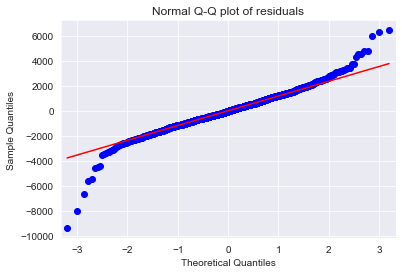

In [22]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model1.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [24]:
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

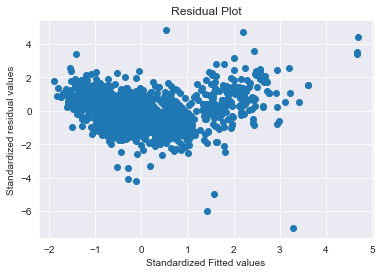

In [26]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

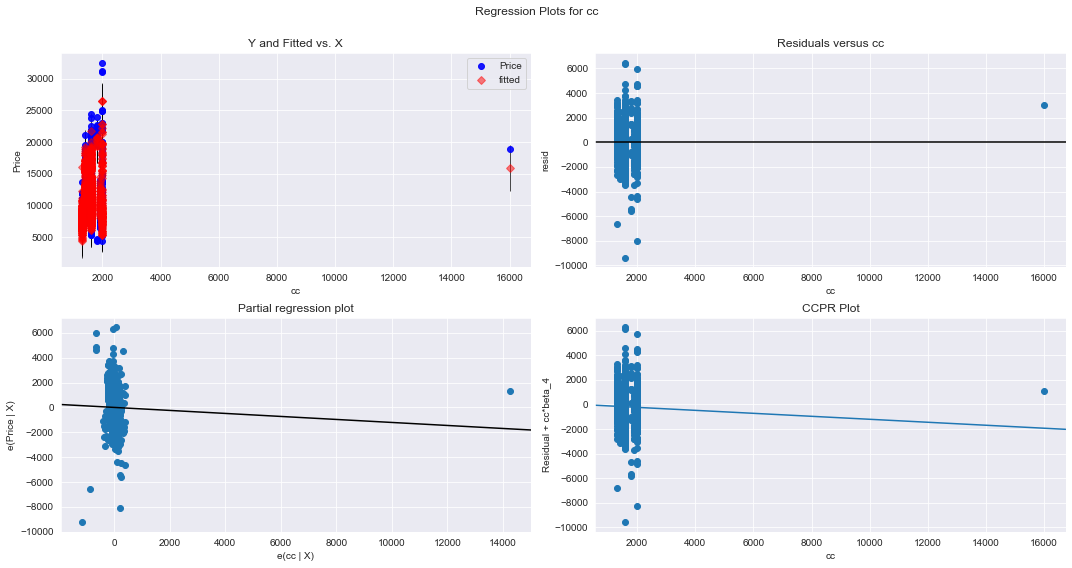

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "cc", fig=fig)
plt.show()

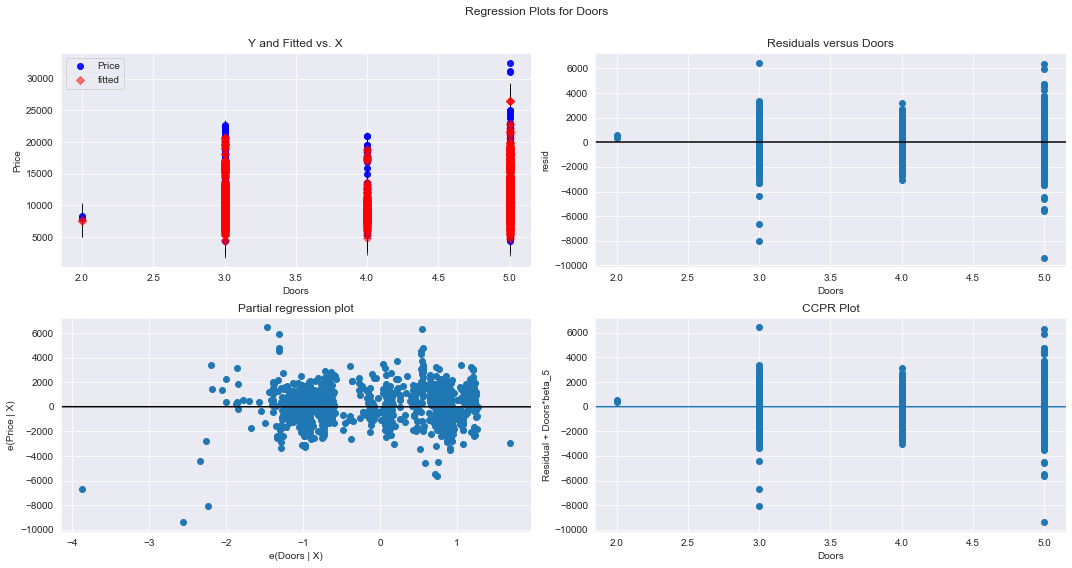

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Doors", fig=fig)
plt.show()

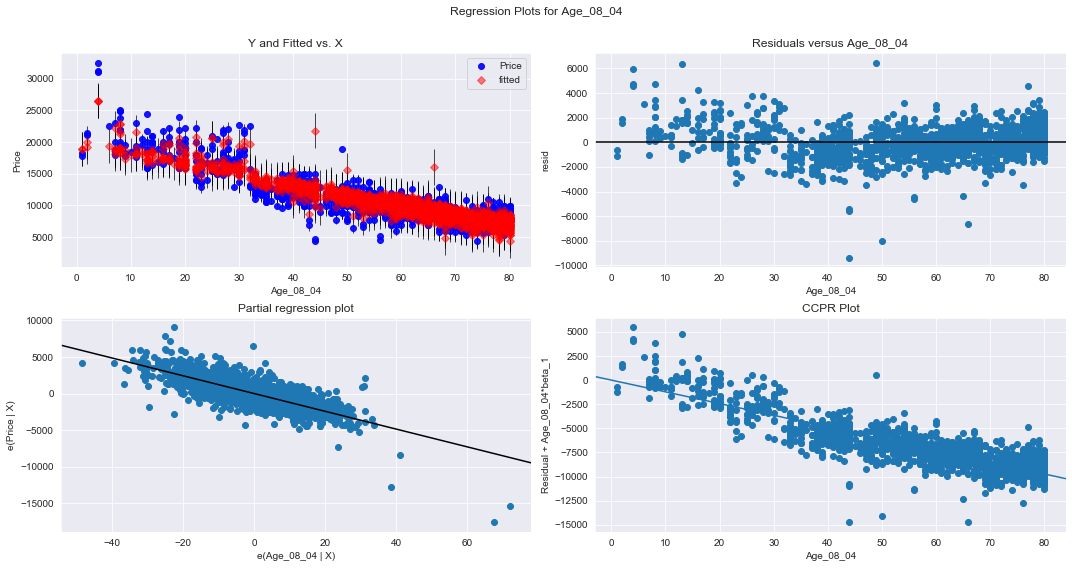

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age_08_04", fig=fig)
plt.show()

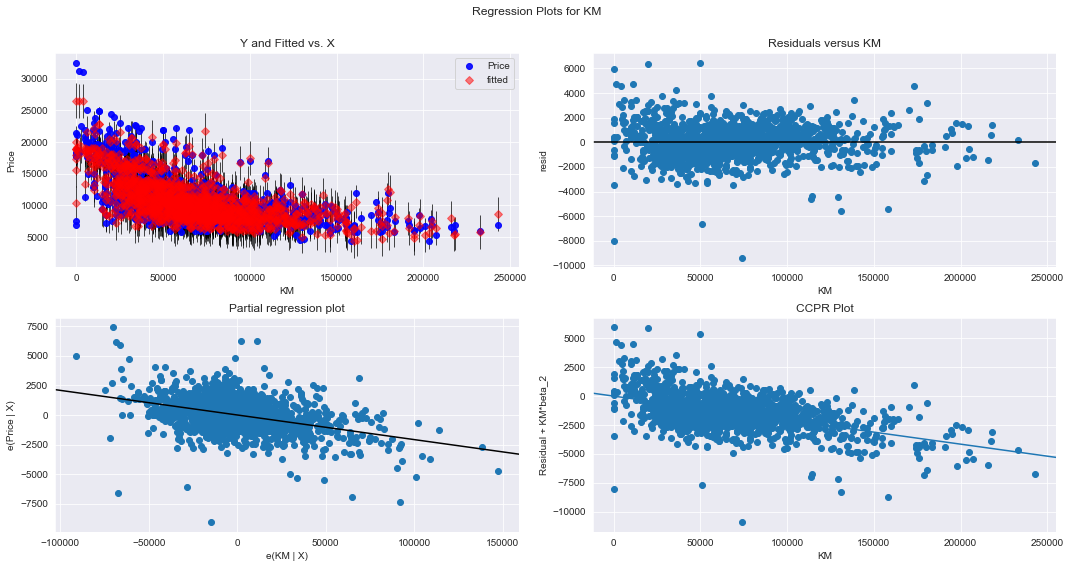

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig)
plt.show()

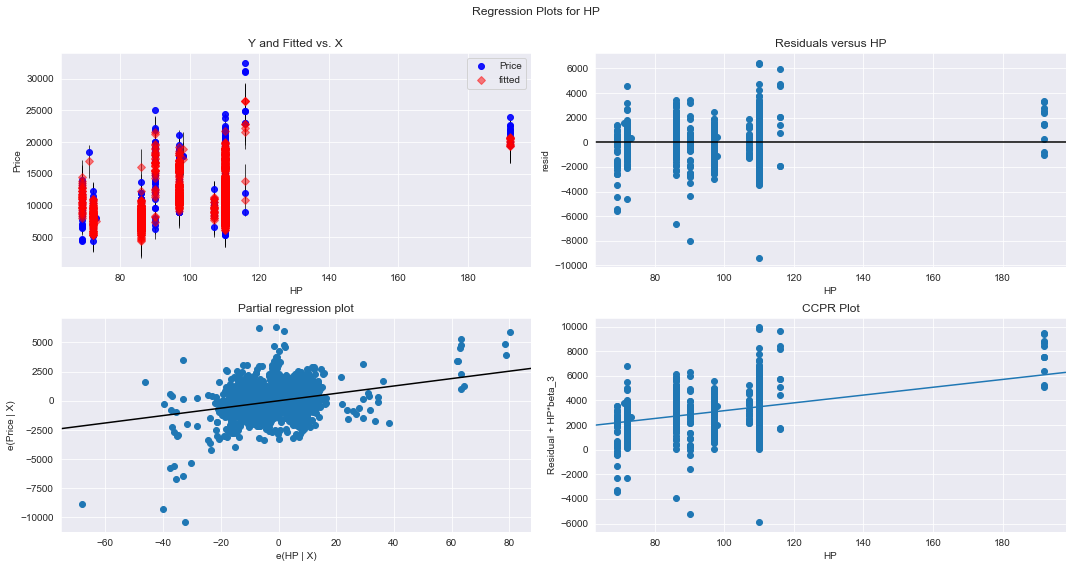

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig)
plt.show()

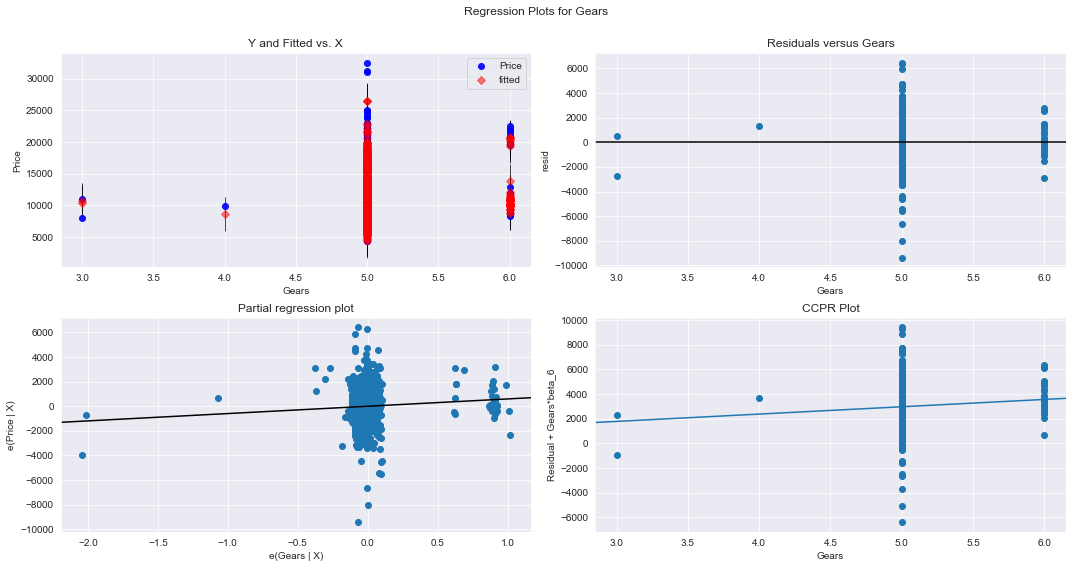

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Gears", fig=fig)
plt.show()

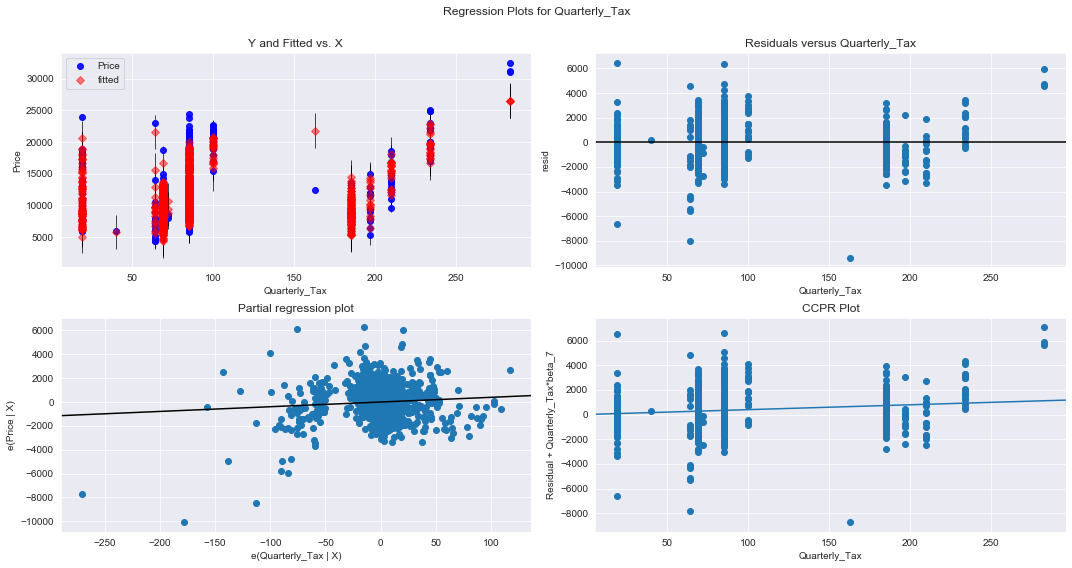

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Quarterly_Tax", fig=fig)
plt.show()

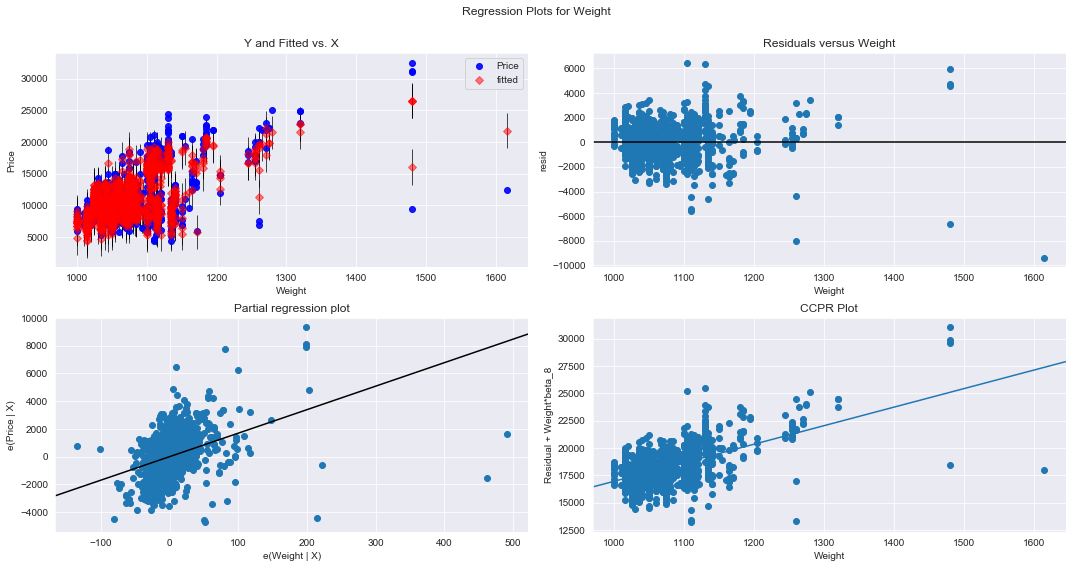

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

# select one of two column cc,door

In [35]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:15:49   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model3 = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1291.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:15:49   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5477.5069   1409.995     -3.885      0.000   -8243.391   -2711.623
Age_08_04      -121.7000      2.616    -46.518      0.000    -126.832    -116.568
KM               -0.0209      0.001    -16.756      0.000      -0.023      -0.018
HP               31.3306      2.807     11.161      0.000      25.824      36.837
Doors            -0.7545     40.012     -0.019      0.985     -79.243      77.734
Gears           598.2602    197.089      3.035      0.002     211.645     984.875
Quarterly_Tax     3.7352      1.301      2.872      0.004       1.184       6.287
Weight           16.7301      1.055     15.864      0.000      14.661      18.799
==============================================================================
Omnibus:                      148.064   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.063
Skew:                          -0.208   Prob(JB):                    6.13e-211
Kurtosis:                       7.001   Cond. No.                     3.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Doors are non significant data variale to determine price

# Model Deletion Diagnostics

### Detecting Influencers/Outliers

## Cook’s Distance

In [37]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


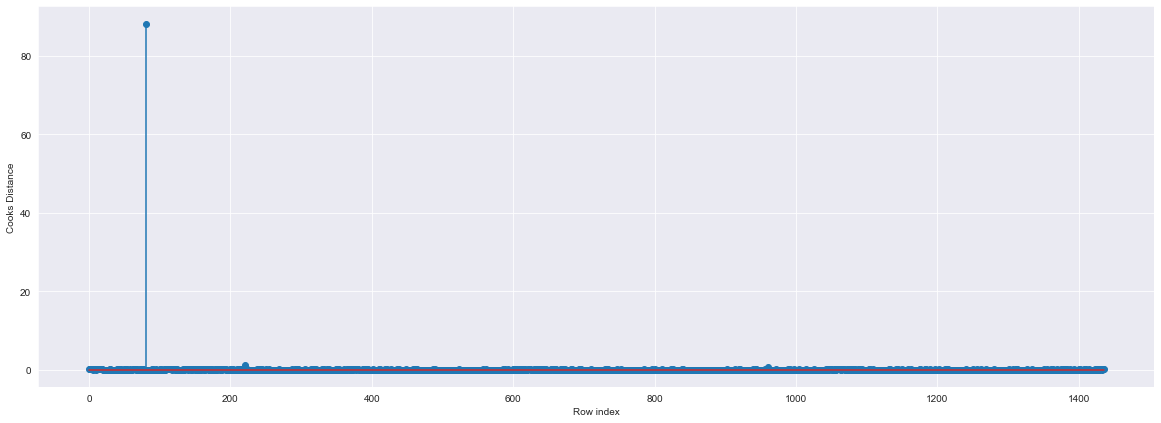

In [38]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 88.2598571029077)

# High Influence points

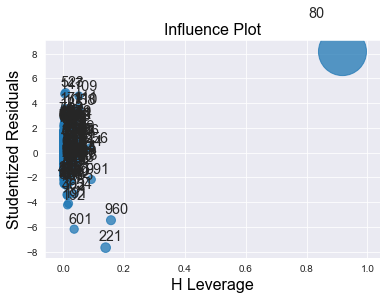

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [41]:
k = toyota_df.shape[1]
n = toyota_df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

- From the above plot, it is evident that data point 80 is the influencer

In [42]:
toyota_df[toyota_df.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [43]:
# Duplicated row
dup = toyota_df[toyota_df.duplicated()]
dup

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [44]:
toyota_df1 = toyota_df.drop(['Doors'],axis=1)
toyota_df1=toyota_df1.drop(toyota_df1.index[[80,113]],axis=0).reset_index()
toyota_df1=toyota_df1.drop(['index'],axis=1)
toyota_df1.head()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170


In [45]:
toyota_df1.shape

(1434, 8)

# Build Model

In [46]:
toyota_df1.head()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170


In [47]:
model_cc_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_df1).fit()
model_cc_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1340.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:15:56   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1426   BIC:                         2.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6225.7366   1383.114     -4.501      0.000   -8938.893   -3512.581
Age_08_04      -120.5104      2.561    -47.058      0.000    -125.534    -115.487
KM               -0.0178      0.001    -13.986      0.000      -0.020      -0.015
HP               39.0416      2.899     13.468      0.000      33.355      44.728
cc               -2.4918      0.306     -8.135      0.000      -3.093      -1.891
Gears           552.2590    189.176      2.919      0.004     181.166     923.352
Quarterly_Tax     8.9718      1.426      6.293      0.000       6.175      11.768
Weight           19.8642      1.079     18.417      0.000      17.748      21.980
==============================================================================
Omnibus:                      235.248   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2493.347
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                       9.408   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cook’s Distance

In [48]:
model_influence_cc = model_cc_1.get_influence()
(c_1, _) = model_influence_cc.cooks_distance

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


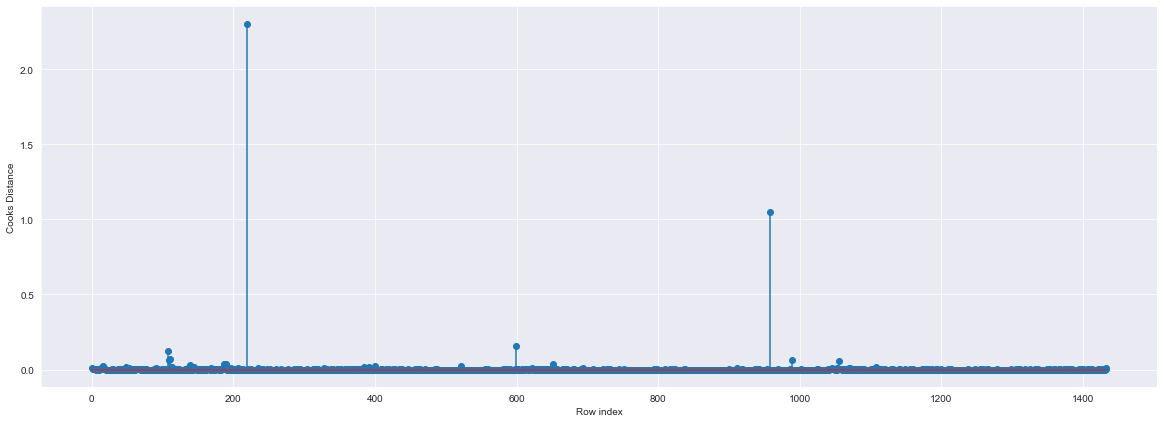

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota_df1)),np.round(c_1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
#index of the data points where c is more than .5
(np.argmax(c_1),np.max(c_1))

(219, 2.3039534822945362)

### Improving Model

In [51]:
# Dropping point 219


toyota_df2=toyota_df1.drop(toyota_df1.index[[219]],axis=0).reset_index()
toyota_df2=toyota_df2.drop(['index'],axis=1)
toyota_df2.shape

(1433, 8)

In [52]:
model_cc_2 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_df2).fit()

In [53]:
model_influence_2 = model_cc_2.get_influence()
(c_2, _) = model_influence_2.cooks_distance

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


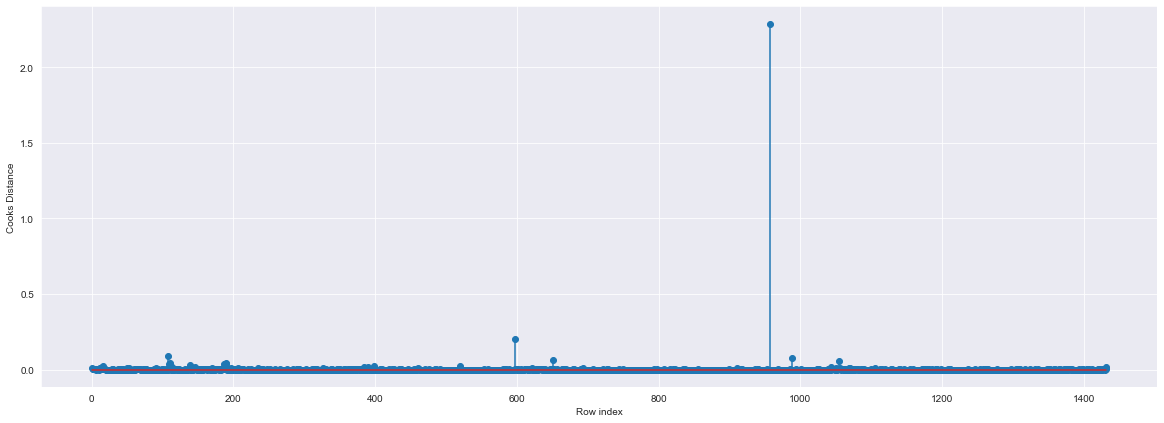

In [54]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_df2)), np.round(c_2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
(np.argmax(c_2),np.max(c_2))

(957, 2.289048255297341)

In [56]:
toyota_df3=toyota_df2.drop(toyota_df2.index[[957,598]],axis=0).reset_index()
toyota_df3=toyota_df3.drop(['index'],axis=1)
toyota_df3.shape

(1431, 8)

In [57]:
model_cc_3 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_df3).fit()

In [58]:
model_influence_3 = model_cc_3.get_influence()
(c_3, _) = model_influence_3.cooks_distance

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


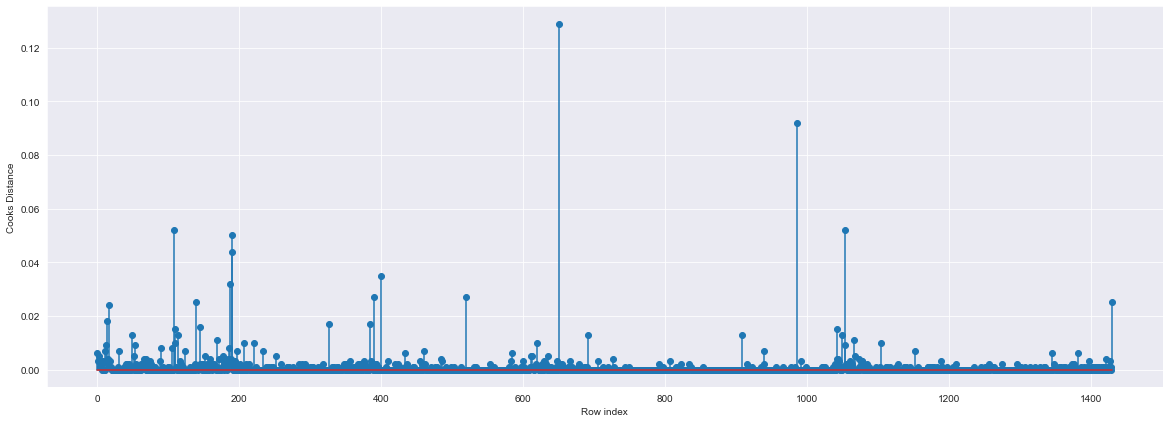

In [59]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_df3)), np.round(c_3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
(np.argmax(c_3),np.max(c_3))

(650, 0.1294187834137887)

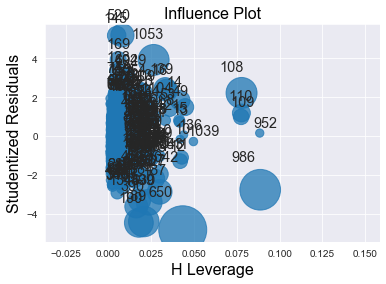

In [61]:
influence_plot(model_cc_3)
plt.show()

In [62]:
k = toyota_df3.shape[1]
n = toyota_df3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.01886792452830189

# Price prediction

In [63]:
price_pred = model_cc_3.predict()
price_pred

array([16187.77669267, 15722.93289062, 16171.37235686, ...,
        8590.03855609,  8702.7218575 , 10901.69661791])

In [64]:
y = pd.DataFrame(price_pred,columns=['Pred'])

In [65]:
error = np.sqrt(np.mean((toyota_df3["Price"]- y['Pred'])**2))
error

1211.39051550128

In [67]:
# Variable : model1 - with all given variables
# Variable : model2 - without cc variable
# Variable : model3 - without doors variable
# Variable : model_cc_1,model_cc_2,model_cc_3 - without doors variable and after deletion of outliers
d1 = {'Variables':['model1','model2','model3','model_cc_1','model_cc_2','model_cc_3'],'R^2':[model1.rsquared,
                                                                                             model2.rsquared,
                                                                                             model3.rsquared,
                                                                                             model_cc_1.rsquared,
                                                                                             model_cc_2.rsquared,
                                                                                             model_cc_3.rsquared],
      'AIC':[model1.aic,model2.aic,model3.aic,model_cc_1.aic,model_cc_2.aic,model_cc_3.aic]}
r2_frame = pd.DataFrame(d1)  
r2_frame

,Variables,R^2,AIC
0,model1,0.863763,24769.076640
1,model2,0.863763,24767.078283
2,model3,0.863590,24768.893819
3,model_cc_1,0.868074,24667.823330
4,model_cc_2,0.876343,24558.640244
5,model_cc_3,0.887051,24395.840243
